# Tasca M6 T01 - Regression

Utilitzarem el dataset "Boston Housing" que conté informació sobre els preus de les cases i factors relacionats amb el seu entorn a diferents barris de Boston l'any 1978.

<h2>Title: Boston Housing Data</h2>
<p><strong>Sources:</strong></p>
<ul>
  <li>(a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.</li>
  <li>(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.</li>
  <li>(c) Date: July 7, 1993</li>
</ul>
<p><strong>Past Usage:</strong></p>
<ul>
  <li>Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261.</li>
  <li>Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.</li>
</ul>
<p><strong>Relevant Information:</strong></p>
<p>Concerns housing values in suburbs of Boston.</p>
<p><strong>Number of Instances:</strong> 506</p>
<p><strong>Number of Attributes:</strong> 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.</p>
<p><strong>Attribute Information:</strong></p>
<ol>
  <li><strong>CRIM:</strong> per capita crime rate by town</li>
  <li><strong>ZN:</strong> proportion of residential land zoned for lots over 25,000 sq.ft.</li>
  <li><strong>INDUS:</strong> proportion of non-retail business acres per town</li>
  <li><strong>CHAS:</strong> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
  <li><strong>NOX:</strong> nitric oxides concentration (parts per 10 million)</li>
  <li><strong>RM:</strong> average number of rooms per dwelling</li>
  <li><strong>AGE:</strong> proportion of owner-occupied units built prior to 1940</li>
  <li><strong>DIS:</strong> weighted distances to five Boston employment centres</li>
  <li><strong>RAD:</strong> index of accessibility to radial highways</li>
  <li><strong>TAX:</strong> full-value property-tax rate per 10,000</li>
  <li><strong>PTRATIO:</strong> pupil-teacher ratio by town</li>
  <li><strong>B:</strong> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
  <li><strong>LSTAT:</strong> % lower status of the population</li>
  <li><strong>MEDV:</strong> Median value of owner-occupied homes in $1000's</li>
</ol>
<p><strong>Missing Attribute Values:</strong> None.</p>

In [284]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")



In [285]:
df = pd.read_csv('housing data.csv', header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']



# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir 
el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [286]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [287]:
df.shape

(506, 14)

In [288]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Amb el "describe" obtenim algunes dades interessants, sobretot comparant els mínims i els màxims d'algunes columnes com CRIM, RM, AGE i MEDV que tenen una gran diferència.

Comprovem si hi ha valors nuls i ens indica que no.

In [267]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Mirem quina correlació hi ha entre valors.

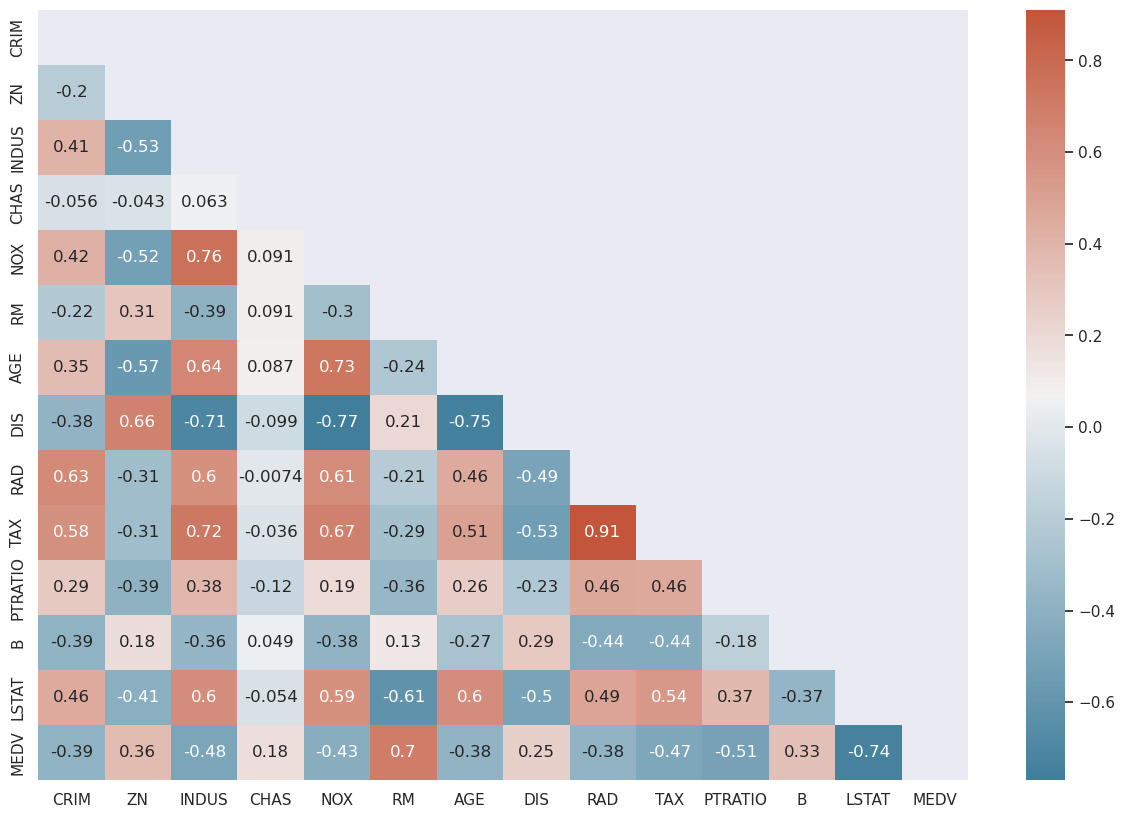

In [268]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()



Text(0.5, 0.98, 'Distribució de les variables numèriques')

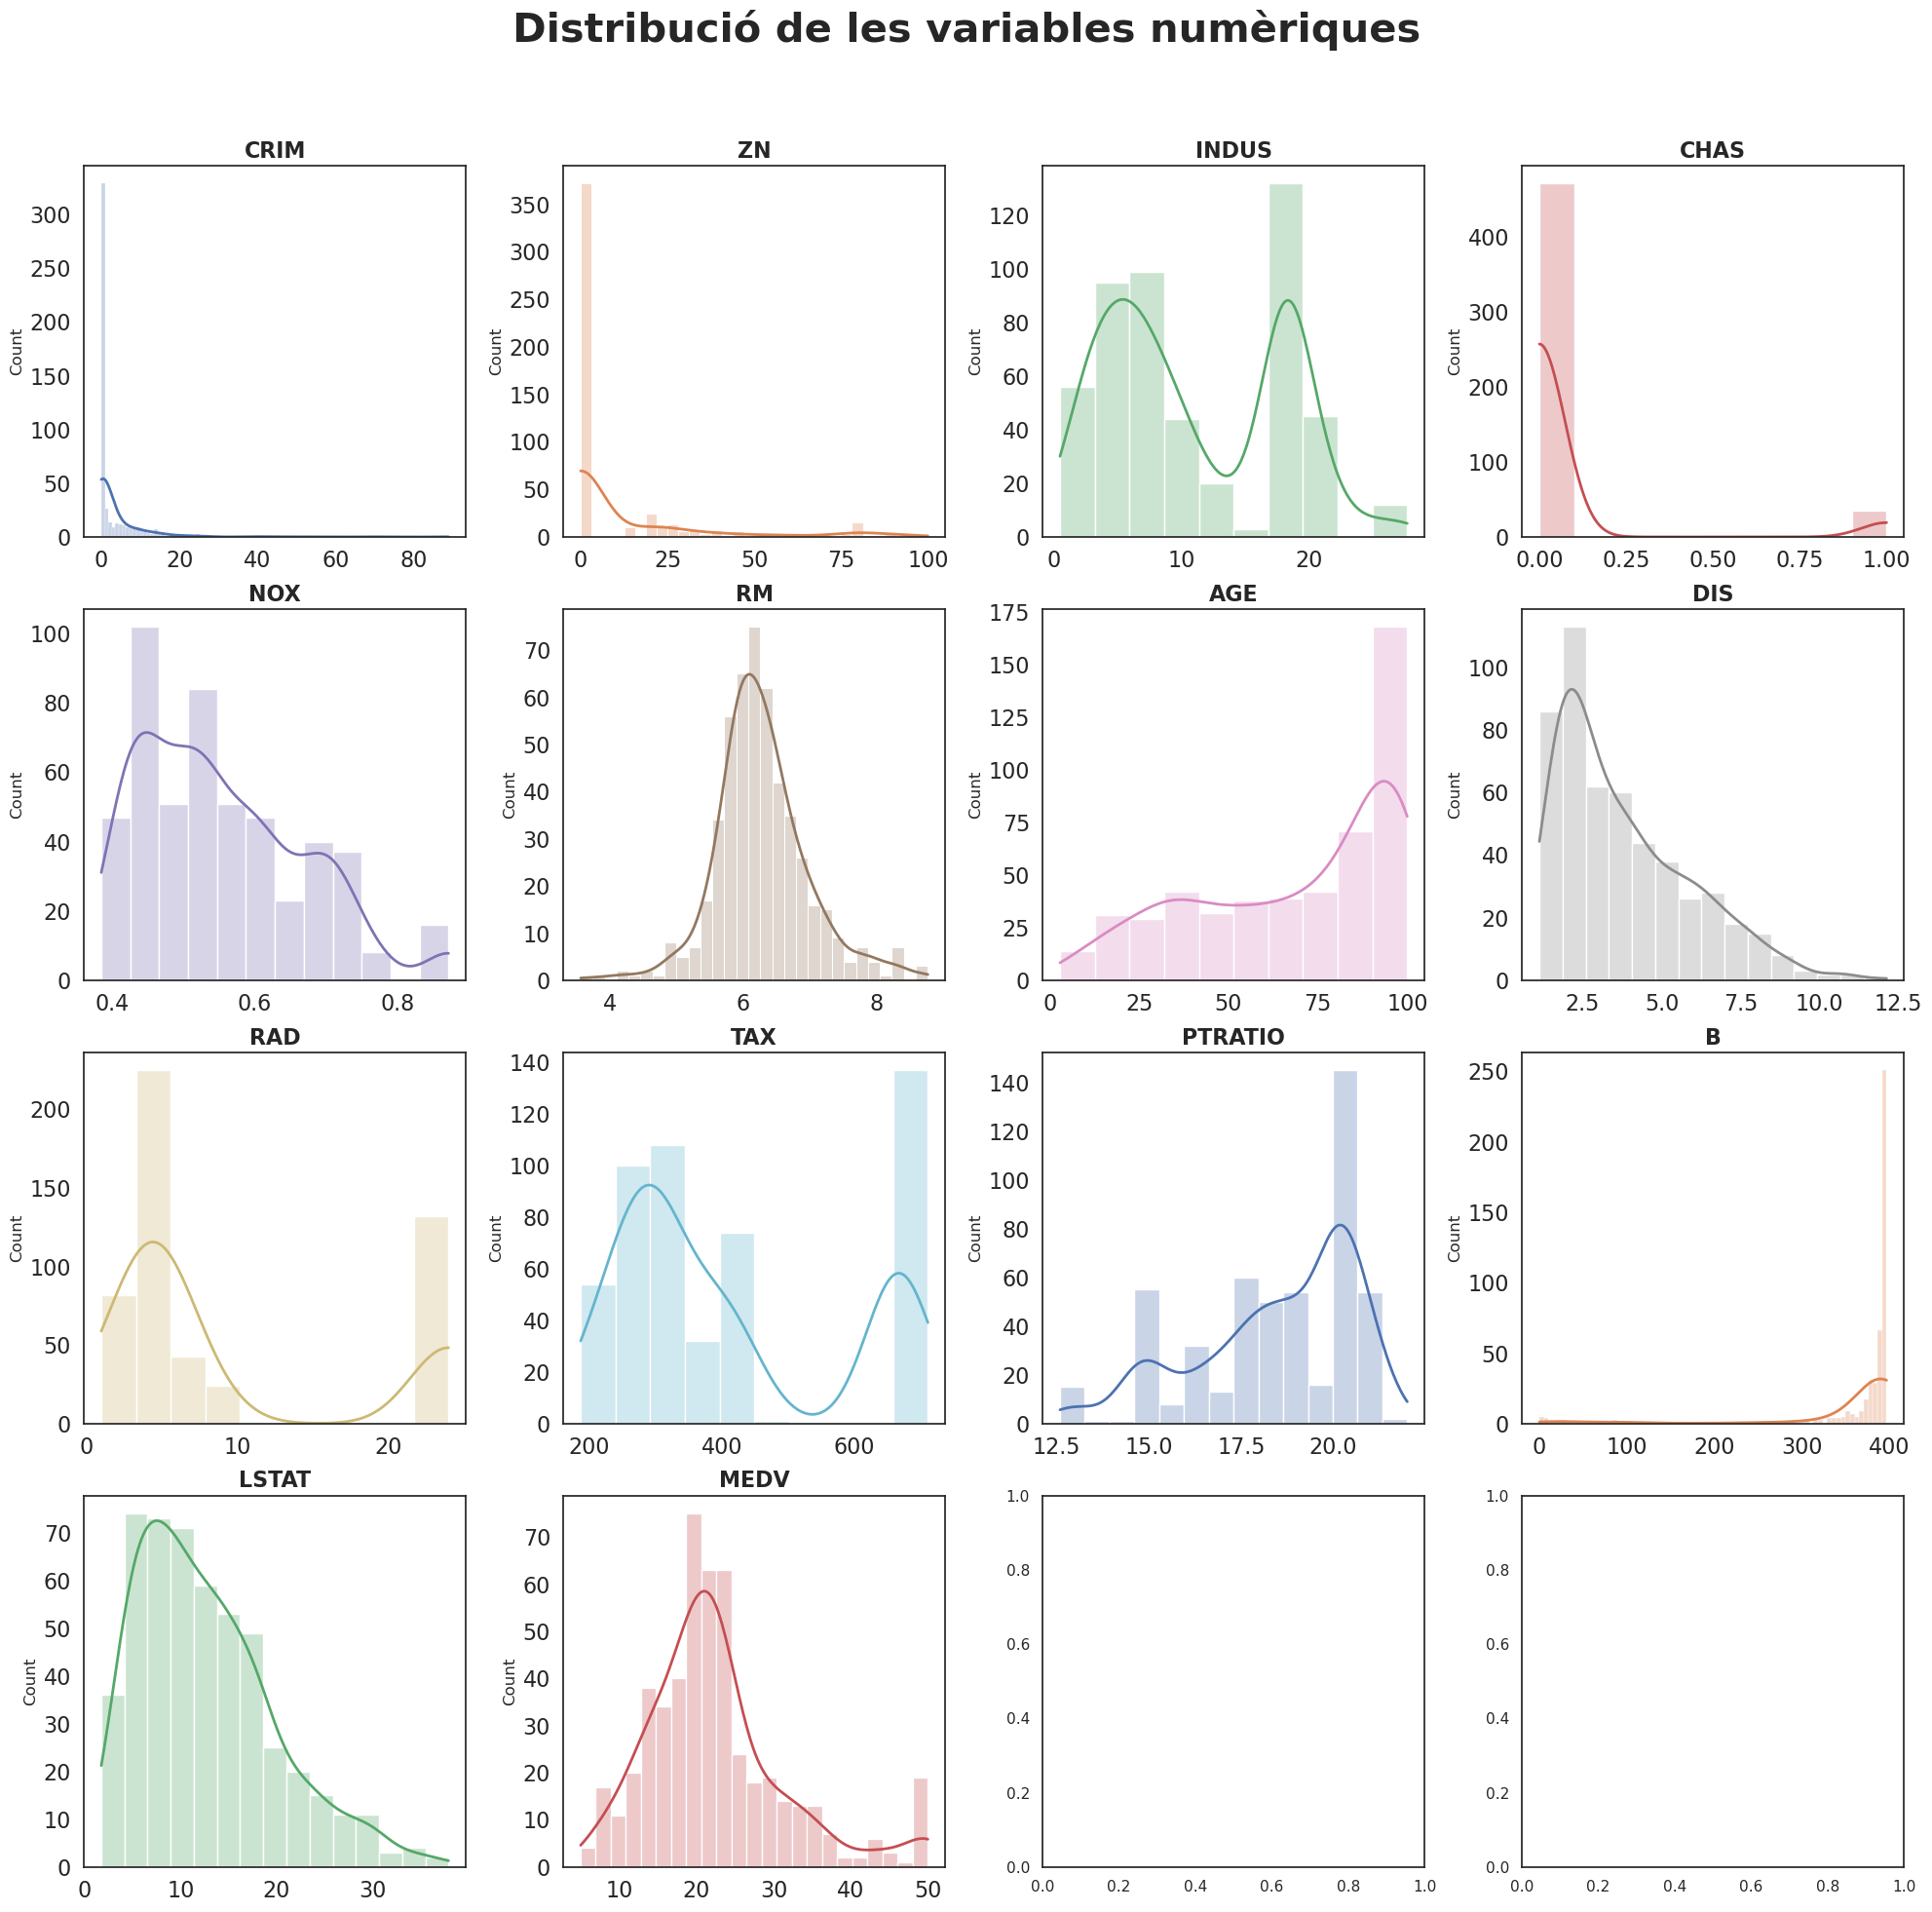

In [269]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(df):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les variables numèriques', fontsize = 30, fontweight = "bold")


<Figure size 800x500 with 0 Axes>

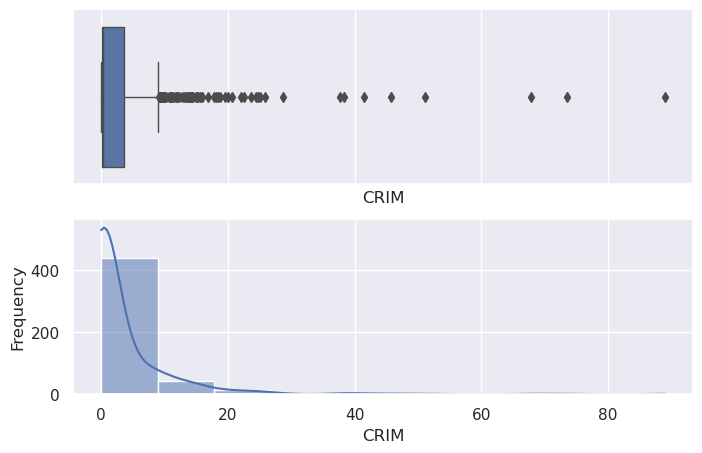

<Figure size 800x500 with 0 Axes>

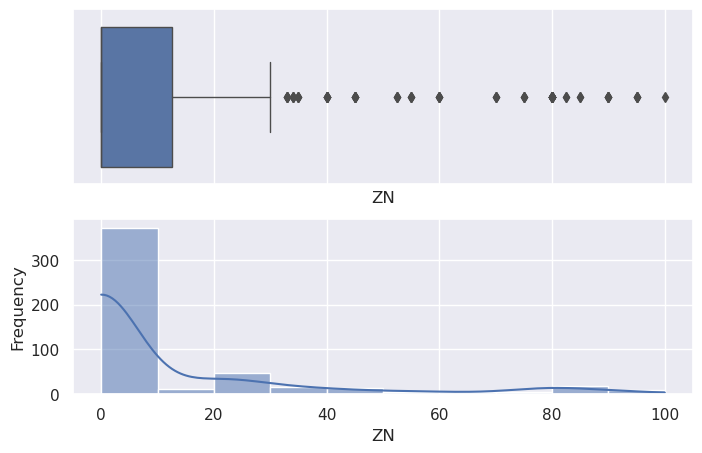

<Figure size 800x500 with 0 Axes>

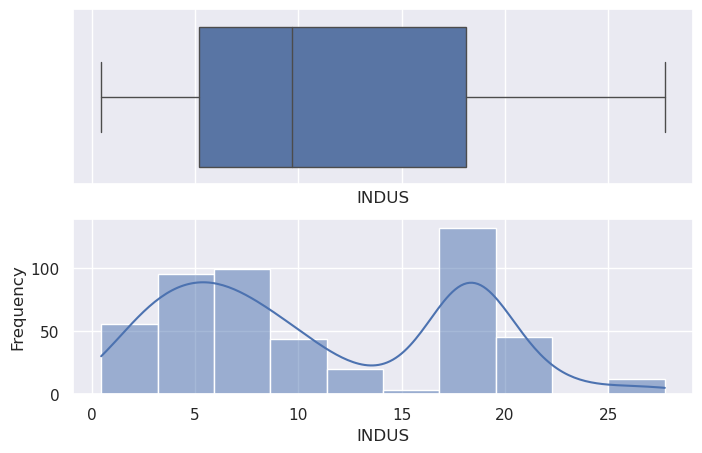

<Figure size 800x500 with 0 Axes>

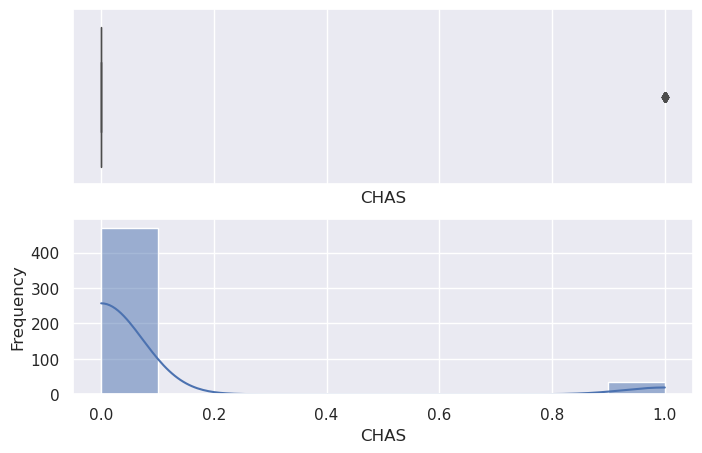

<Figure size 800x500 with 0 Axes>

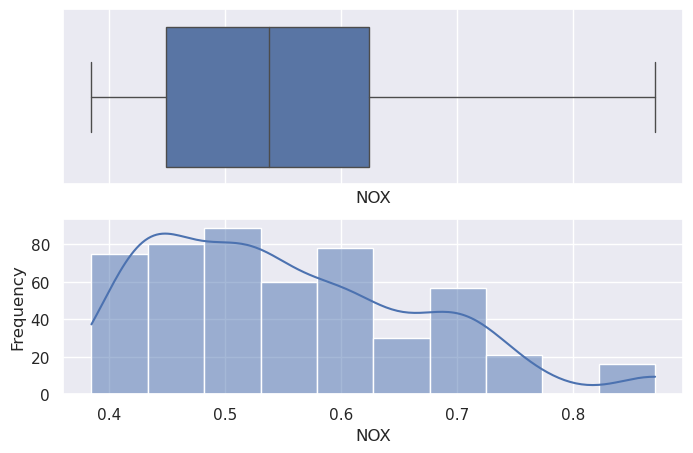

<Figure size 800x500 with 0 Axes>

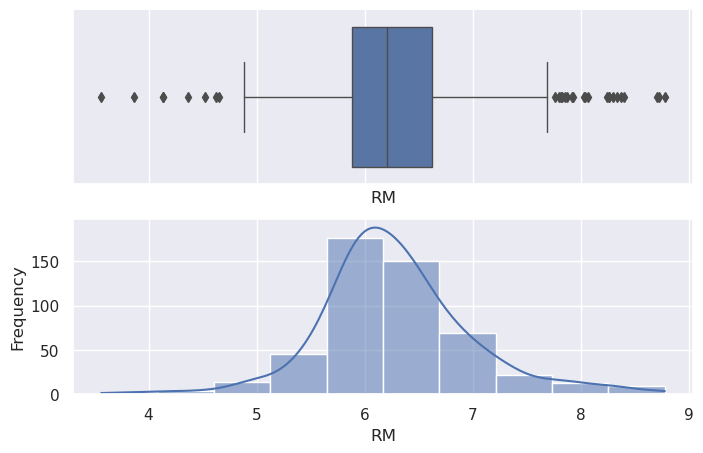

<Figure size 800x500 with 0 Axes>

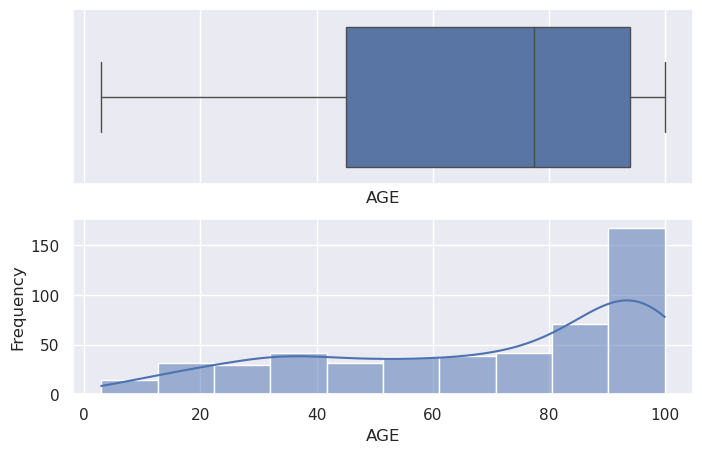

<Figure size 800x500 with 0 Axes>

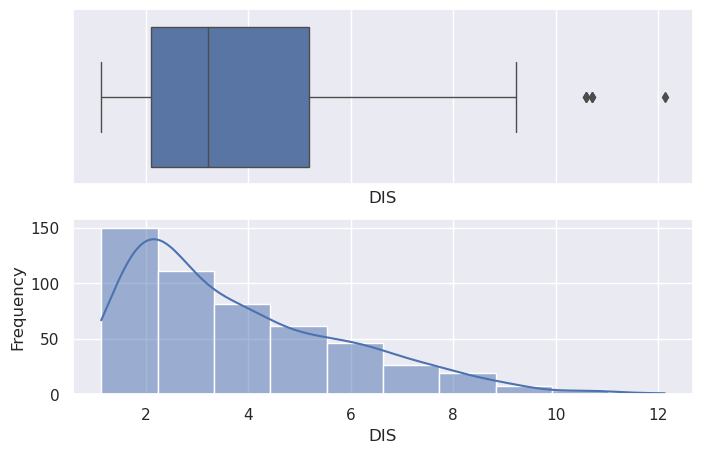

<Figure size 800x500 with 0 Axes>

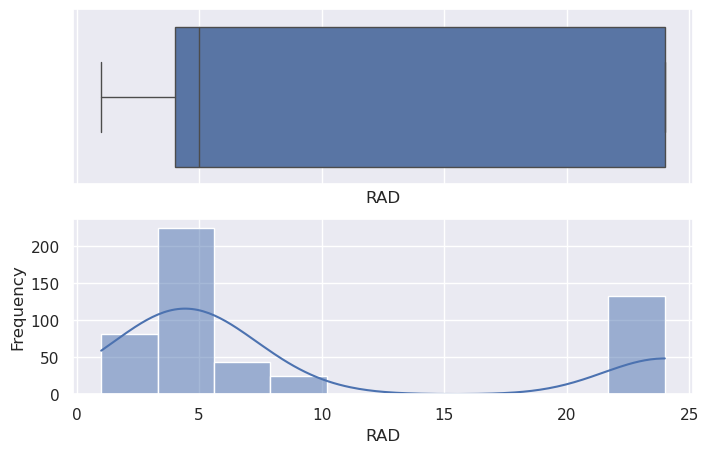

<Figure size 800x500 with 0 Axes>

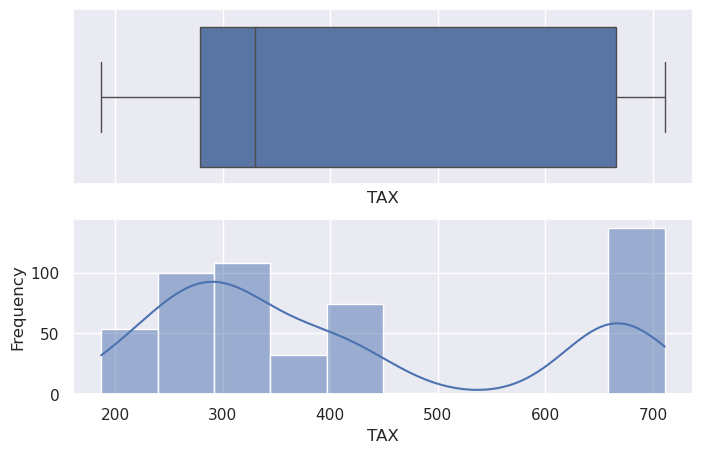

<Figure size 800x500 with 0 Axes>

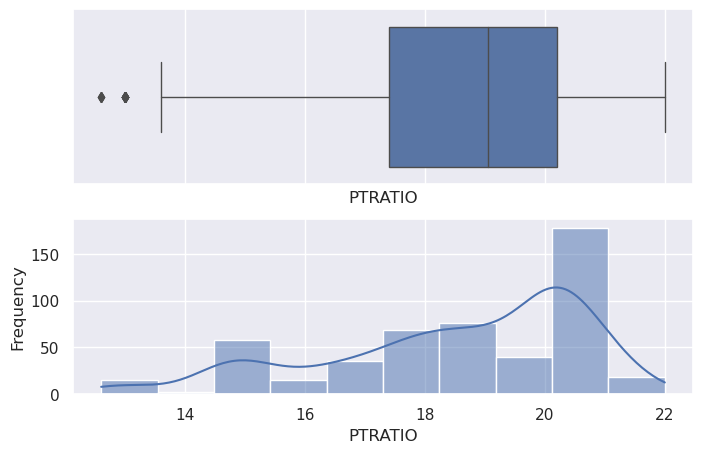

<Figure size 800x500 with 0 Axes>

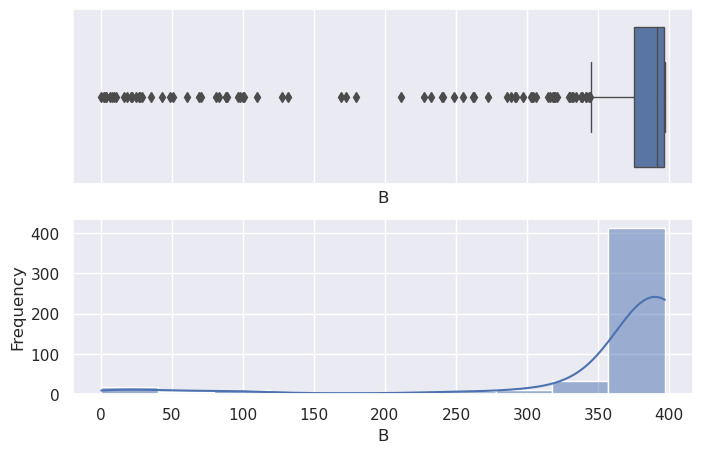

<Figure size 800x500 with 0 Axes>

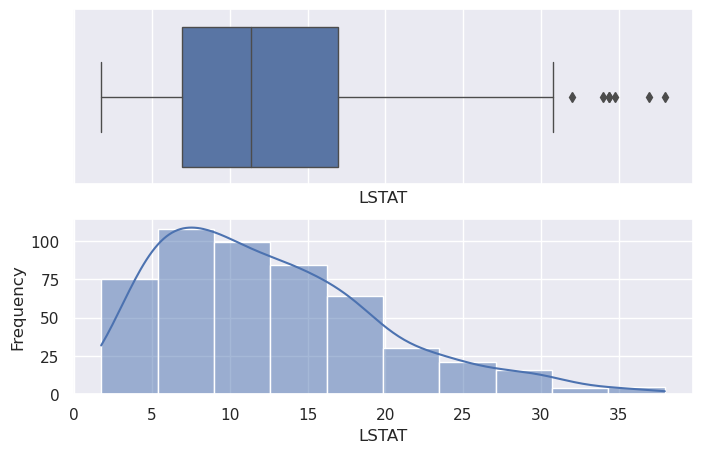

<Figure size 800x500 with 0 Axes>

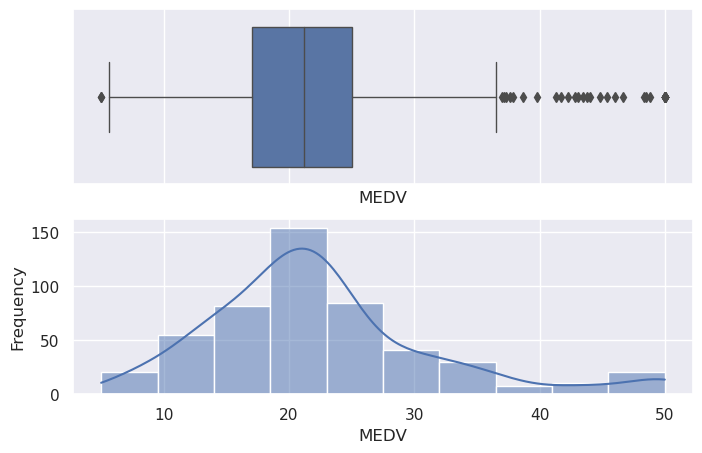

In [270]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

 
  
     
        
Dels gràfics anteriors podem concloure que, en general, les altres variables tenen poca correlació amb la variable MEDV, a part dels atributs RM amb un 0.7 positiu i LSTAT amb una correlació negativa de -0.74.
Les columnes CRIM, ZN, RM, B, PTRATIO, LSTAT i MEDV presenten outliers i la majoria de variables no es distribueixen normalment (l'única que a priori sembla gaussiana seria la TAX).
 
 

   

Es comprova si les variables segueixen una distribució normal mitjançant el Test de Shapiro.

    

In [271]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")
        



Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  CRIM amb un p-value de  1.3285678005931464e-36
Podem rebutjar l'hipotesis nula

Per la variable  ZN amb un p-value de  7.882576753156324e-34
Podem rebutjar l'hipotesis nula

Per la variable  INDUS amb un p-value de  1.0642375893751083e-17
Podem rebutjar l'hipotesis nula

Per la variable  CHAS amb un p-value de  2.350467979135232e-40
Podem rebutjar l'hipotesis nula

Per la variable  NOX amb un p-value de  5.775851259944009e-14
Podem rebutjar l'hipotesis nula

Per la variable  RM amb un p-value de  2.4107271734408187e-10
Podem rebutjar l'hipotesis nula

Per la variable  AGE amb un p-value de  2.2311304847966706e-18
Podem rebutjar l'hipotesis nula

Per la variable  DIS amb un p-value de  2.1851281171594835e-17
Podem rebutjar l'hipotesis nula

Per la variable  RAD amb un p-value de  8.072354053650428e-30
Podem rebutjar l'hipotesis nula

Per la varia

Normalitzem 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX' amb standardscaler perquè segons el p-value no té valors normals i les que presenten outliers segons els gràfics 'CRIM', 'ZN','CHAS', 'RM', 'DIS','PTRATIO', 'B', 'LSTAT' farem RobustScaler.


In [272]:
columnsNorm = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['CRIM', 'ZN','CHAS', 'RM', 'DIS','PTRATIO', 'B', 'LSTAT']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])


Apliquem el train amb la MEDV com a target, dividint el conjunt en un 80-20%.

In [273]:
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)


print("Exemples utilitzats per al Train: ", len(X_train))
print("Exemples utilitzats per al Test: ", len(y_test))



Exemples utilitzats per al Train:  404
Exemples utilitzats per al Test:  102


Fem primer un model de regressió lineal per intentar predir el millor preu de les vivendes

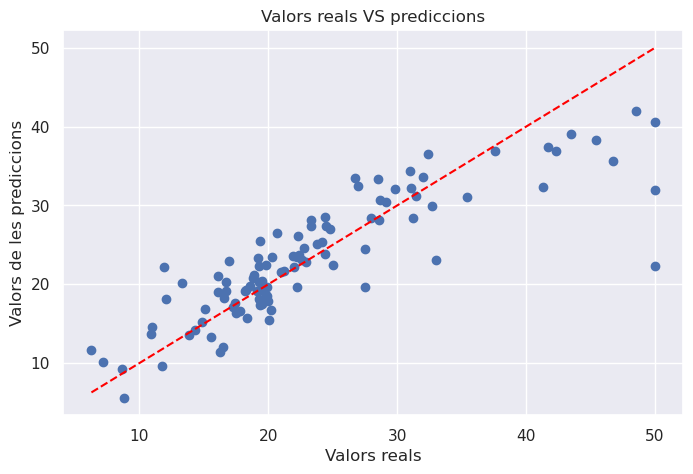

La precisió d'aquest model és de: 0.7263451459702511


In [274]:
modelRegL= LinearRegression()
modelRegL.fit(X_train, y_train)
predi = modelRegL.predict(X_test)
plt.scatter(y_test, predi)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valors reals')
plt.ylabel('Valors de les prediccions')
plt.title('Valors reals VS prediccions')
plt.show()

test_accL= modelRegL.score(X_test, y_test)
print("La precisió d'aquest model és de:", test_accL)


El segon model serà de regressió en arbre de decissió i amb una profunditat de 4 branques

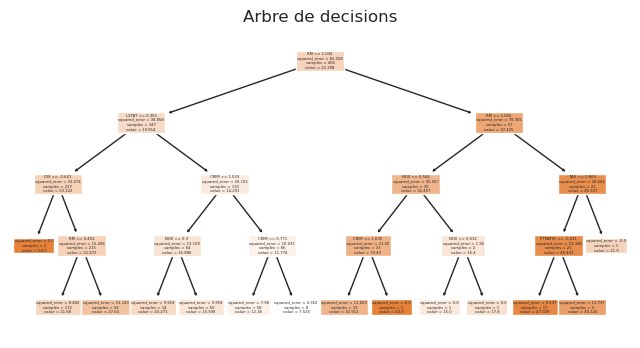

La precisió d'aquest model és de: 0.690308244390474


In [275]:
model_ad = DecisionTreeRegressor(random_state=42, max_depth=4)
model_ad.fit(X_train, y_train)
pred_ad = model_ad.predict(X_test)
pred_ad
plt.figure(figsize=(8, 4))  
plot_tree(model_ad, feature_names=X.columns, filled=True)
plt.title('Arbre de decisions')
plt.show()

test_accL= model_ad.score(X_test, y_test)
print("La precisió d'aquest model és de:", test_accL)

La regressió lineal obté millors resultats en la predicció que l'arbre de decisions amb
0.721 i 0.69 respectivament.

# Exercici 2
Compara’ls en base al MSE i al R2.

In [276]:
#R2

r2_reg = r2_score(y_test, predi)
r2_ad = r2_score(y_test, pred_ad)

#MSE
mse_Reg = mean_squared_error(y_test, predi)
mse_ad = mean_squared_error(y_test, pred_ad)


metrics = pd.DataFrame( data = [['Linear Regression', r2_reg, mse_Reg],
                                  ['DecisionTreeRegressor', r2_ad, mse_ad]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()


,Model,R2,MSE
0,Linear Regression,0.726345,25.419587
1,DecisionTreeRegressor,0.690308,28.767027


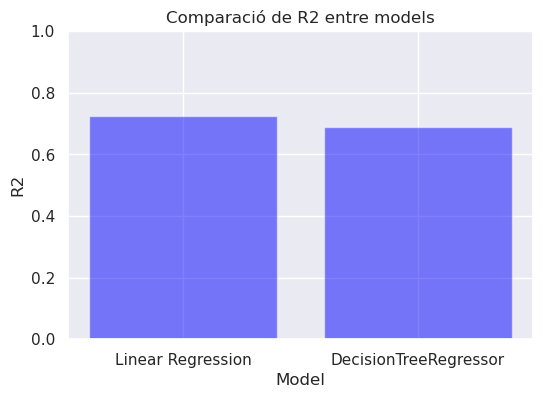

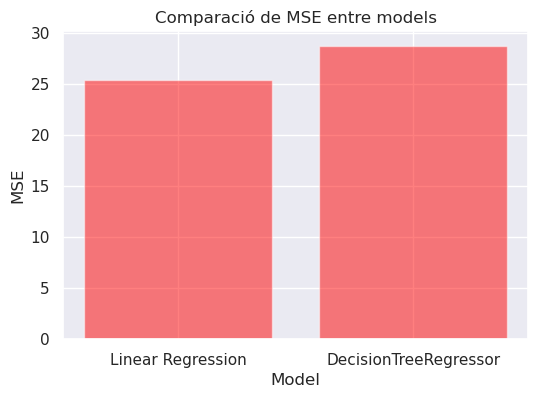

                   Model        R2        MSE
0      Linear Regression  0.726345  25.419587
1  DecisionTreeRegressor  0.690308  28.767027


In [277]:
plt.figure(figsize=(6, 4))
plt.bar(metrics['Model'], metrics['R2'], color='blue', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Comparació de R2 entre models')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(metrics['Model'], metrics['MSE'], color='red', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Comparació de MSE entre models')
plt.show()
print(metrics)




Entre els dos models, el de regressió lineal mostra un MSE menor i un R2 major que el de l'arbre de decisions per aquest motiu el primer prediu millor els preus. 



# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [278]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

Començarem amb el model de regressió lineal afegint els paràmetres 'fit_intercept' i 'normalize'.

In [279]:
modelRegL= LinearRegression(fit_intercept=True, normalize=True)
modelRegL.fit(X_train, y_train)
predi = modelRegL.predict(X_test)
r2_reg2 = r2_score(y_test, predi)
mse_Reg2 = mean_squared_error(y_test, predi)

comp_RegL = pd.DataFrame( data = [('Linear Regression Original', r2_reg, mse_Reg), 
                                  ('Linear Regression Paràmetres', r2_reg2, mse_Reg2),],
                         columns = ['Model', 'R2', 'MSE'])
comp_RegL


,Model,R2,MSE
0,Linear Regression Original,0.726345,25.419587
1,Linear Regression Paràmetres,0.726345,25.419587


Ara farem el model DecisionTreeRegressor canviant els paràmetres 'max_depth' i 'random_state'.

In [280]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [281]:
model_ad = DecisionTreeRegressor(random_state=20, max_depth=8)
model_ad.fit(X_train, y_train)
pred_ad = model_ad.predict(X_test)

r2_ad2 = r2_score(y_test, pred_ad)
mse_ad2 = mean_squared_error(y_test, pred_ad)


comp_Ad = pd.DataFrame( data = [('DecisionTreeRegressor Original', r2_ad, mse_ad), 
                                  ('DecisionTreeRegressor Paràmetres', r2_ad2, mse_ad2),],
                         columns = ['Model', 'R2', 'MSE'])
comp_Ad




,Model,R2,MSE
0,DecisionTreeRegressor Original,0.690308,28.767027
1,DecisionTreeRegressor Paràmetres,0.746177,23.577453


Respecte al model de regressió lineal, tot i que he jugat amb tots els paràmetres no he trobat cap que millores la predicció.
Amb el model DecisionTreeRegressor si que hem notat una millora en augmentar de 4 a 8 nodes el 'max_depth' i 'random_state' canviant de 42 a 20. En concret el MSE ha baixat de 28.76 a 23.57 i el R2 ha pujat de 0.69 a 0.74.

# Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).



In [282]:
#Cross Validation
cv_regL = cross_val_score(modelRegL, X, y, cv=5, scoring='r2')
cv_ad = cross_val_score(model_ad, X, y, cv=5, scoring='r2')
cv_lr_mean = [cv_regL.mean(), cv_ad.mean()]
metrics['R2 with CV'] = cv_lr_mean
metrics.head()



,Model,R2,MSE,R2 with CV
0,Linear Regression,0.726345,25.419587,0.353276
1,DecisionTreeRegressor,0.690308,28.767027,0.242141


El Cross Validation ens indica que el model de regressió lineal és millor en comparació al model DecisionTreeRegressor. 

# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [283]:
X = df.drop(['MEDV', 'RM'], axis=1) 
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

modelRegL = LinearRegression()
modelRegL.fit(X_train, y_train)
predi = modelRegL.predict(X_test)

model_ad = DecisionTreeRegressor(random_state=42, max_depth=8)
model_ad.fit(X_train, y_train)
pred_ad = model_ad.predict(X_test)

r2_reg = r2_score(y_test, predi)
r2_ad = r2_score(y_test, pred_ad)

mse_Reg = mean_squared_error(y_test, predi)
mse_ad = mean_squared_error(y_test, pred_ad)

metrics = pd.DataFrame(data=[['Linear Regression', r2_reg, mse_Reg],
                             ['DecisionTreeRegressor', r2_ad, mse_ad]],
                       columns=['Model', 'R2', 'MSE'])
metrics.head()

cv_regL = cross_val_score(modelRegL, X, y, cv=5, scoring='r2')
cv_ad = cross_val_score(model_ad, X, y, cv=5, scoring='r2')
cv_lr_mean = [cv_regL.mean(), cv_ad.mean()]
metrics['R2 with CV'] = cv_lr_mean
metrics.head()



,Model,R2,MSE,R2 with CV
0,Linear Regression,0.694669,28.361971,0.493532
1,DecisionTreeRegressor,0.728450,25.224084,0.299125


En aquest exercici podem notar sobretot dues coses rellevants:
    
La primera, que a diferència de l'anterior exercici, aquí el millor model per predir és l'arbre de decisions i no el de regressió lineal.

La segona és que la variable RM té una gran rellevància i treure-la modifica substancialment els resultats, en altres paraules el número d'habitacions pot modificar substancialment la predicció dels preus.